In [51]:
import pandas as pd
import scipy.stats as stats
df_house = pd.read_csv('../../datasets/houseprice.csv')
df_house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

In [53]:

# 데이터 타입 및 결측치 확인
print("\n데이터 타입과 결측치 확인:")
print(df_house.info())


데이터 타입과 결측치 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

In [54]:
# 기술 통계량 확인 (수치형 데이터)
print("\n수치형 데이터의 기술 통계량:")
print(df_house.describe())


수치형 데이터의 기술 통계량:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.06620

In [55]:
# 결측치 비율 확인
print("\n결측치 비율 확인:")
print(df_house.isnull().mean() * 100)


결측치 비율 확인:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [56]:
# 'LotFrontage'의 결측치를 최빈값으로 대체(최빈값은 극단적인 값의 영향을 받지 않기 때문에, 평균으로 대체하는 것보다 안정적)
for column in ['LotFrontage']:
    most_frequent = df_house[column].mode()[0]
    df_house[column].fillna(most_frequent, inplace=True)


/tmp/ipykernel_95496/3630256368.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_house[column].fillna(most_frequent, inplace=True)


In [57]:
# 결측치 비율 확인
print("\n결측치 비율 확인:")
print(df_house.isnull().mean() * 100)


결측치 비율 확인:
Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64


In [58]:
price_area = df_house[['SalePrice', 'LotArea']].corr()
price_area

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


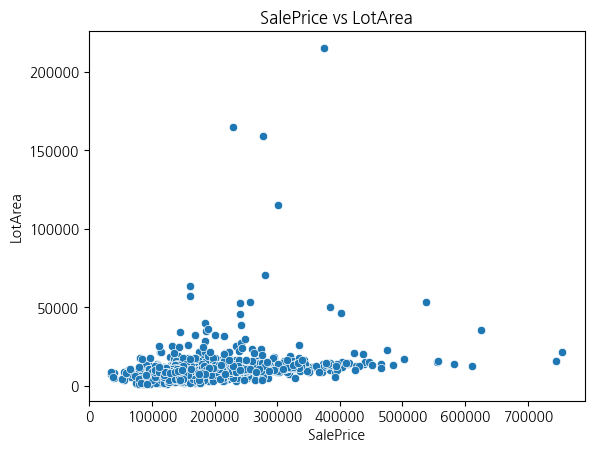

In [59]:
sns.scatterplot(x='SalePrice', y='LotArea', data=df_house)
plt.title('SalePrice vs LotArea')
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.show()

In [60]:
correlation = df_house[['LotArea', 'SalePrice']].corr()
correlation

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


- 약한 양의 상관관계가 존재(두 컬럼 연관은 있으나 그리 강한 연관은 아님) - 대립가설

In [61]:
price_totrms = df_house[['SalePrice', 'TotRmsAbvGrd']].corr()
price_totrms

,SalePrice,TotRmsAbvGrd
SalePrice,1.000000,0.533723
TotRmsAbvGrd,0.533723,1.000000


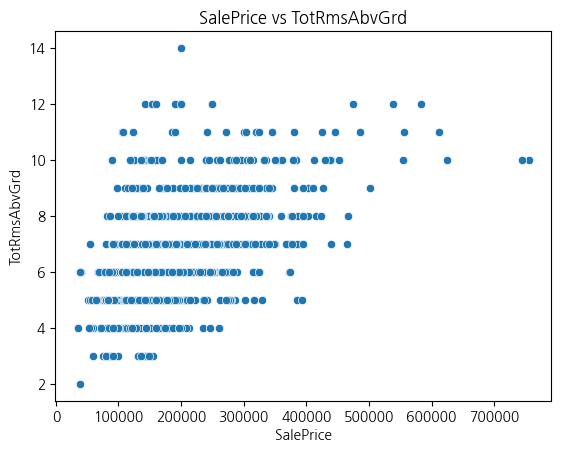

In [62]:
sns.scatterplot(x='SalePrice', y='TotRmsAbvGrd', data=df_house)
plt.title('SalePrice vs TotRmsAbvGrd')
plt.xlabel('SalePrice')
plt.ylabel('TotRmsAbvGrd')
plt.show()

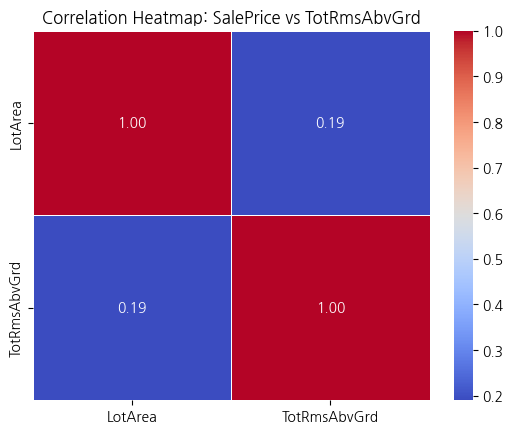

In [63]:
sns.heatmap(correlation2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: SalePrice vs TotRmsAbvGrd')
plt.show()

In [64]:
correlation2 = df_house[['LotArea', 'TotRmsAbvGrd']].corr()
correlation2

,LotArea,TotRmsAbvGrd
LotArea,1.000000,0.190015
TotRmsAbvGrd,0.190015,1.000000


- 약한 양의 상관 관계가 있음